In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D


In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [110]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Coordinates

## Cartesian coordinates

The most common coordinates are *Cartesian coordinates*, where we use a number $n$ of perpendicular axes. The coordinates corresponding to these axes are $x_j$ where $j=1, \ldots, n$. The distance $\Delta s$ between two points $(x_1, x_2, \ldots, x_n)$ and 
$(x'_1, x'_2, \ldots, x'_n)$ is given by 
$$
\Delta s^2 = (x'_1 - x_1)^2 + (x'_2 - x_2)^2 + \ldots + (x'_n - x_n)^2.
$$
The expression on the right hand side can be written using a summation sign $\sum$:
$$
\Delta s^2 = \sum_{i=1}^n (x'_i - x_i)^2.
$$
A space with such a distance definition is called a *Euclidean space*.

Cartesian coordinates are used a lot. They are suitable for infinite spaces or for rectangular volumes.


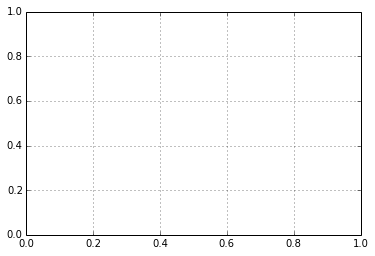

In [111]:
plt.grid(True)

## Polar coordinates

It often turns out useful to change to a different type of coordinate system. For example, if you want to describe the vibrations of a circular drum, polar coordinates turn out very convenient. These are restricted to two-dimensional space (a plane). When using such coordinates, a position on the plane is characterised by two coordinates: the *distance* $r$ from the point to the origin and the angle ($\varphi$). This is the angle between the line connecting the point to the origin and the $x$-axis. 
> Note that each Cartesian coordinate has a *dimension* of length; in polar coordinates, the radius $r$ has a dimension of *length*, whereas the angular coordinate $\varphi$ is dimensionless.



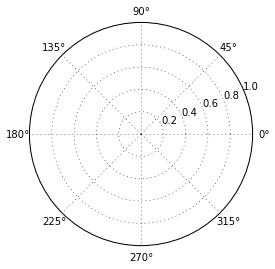

In [112]:
plt.grid(True)
ax = plt.subplot(111, polar=True)

In this plot you can distinguish the radial coordinate (0.2, 0.4 etc.) from the angular one ($0^\circ$, $45^\circ$ etc.).

The plot below shows a point on a curve with the polar coordinates $(r,\varphi)$ indicated. From this, we can see that the *Cartesian* coordinates $(x,y)$ of the point are related to the polar ones as follows:
$$ x = r \cos\varphi; $$
$$ y = r \sin \varphi.$$

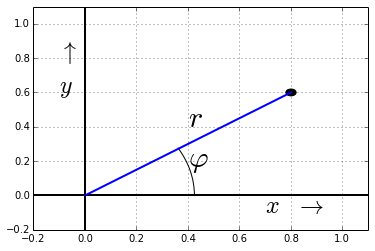

In [113]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig1=plt.figure()
plt.xlim(-0.2, 1.1)
plt.ylim(-0.2, 1.1)
plt.grid(True)
plt.axhline(linewidth=2.0, color="black")
plt.axvline(linewidth=2.0, color="black")
font = FontProperties()
font.set_size(30)
plt.text(0.4,0.4,'$r$',fontproperties=font)
plt.text(0.4,0.17,'$\\varphi$', fontproperties=font)
font.set_size(24)
plt.text(0.7,-0.1,'$x\; \\rightarrow$',fontproperties=font)
plt.text(-0.1,0.6,'$y$', fontproperties=font)
plt.text(-0.1,0.8,'$\\uparrow$', fontproperties=font)
x = np.array([0.0,0.8])
y = np.array([0.0,0.6])
plt.plot(x,y,linewidth=2)
circle1=plt.Circle((0.8,0.6),.02,color='black')
fig = plt.gcf()
fig.gca().add_artist(circle1)
ax1 = fig1.add_subplot(111)
ax1.add_patch(
    patches.Arc((0.0, 0.0),   # (x,y)
        0.85, 1.05, 0.0, 0.0, 32          # radius
    )
)
plt.show()

Now suppose we want to calculate the distance between two points, one with polar coordinates $(r_1, \varphi_1)$, and the other with $(r_2, \varphi_2)$. This looks like a difficult exercise. A convenient way to perform this is by translating the polar coordinates into Cartesian coordinates and using the expression given above for this distance: 
$$\Delta s^2 = (x_1 - x_2)^2 + (y_1 - y_2)^2,$$
so 
$$ \Delta s^2 = (r_1\cos\varphi_1 - r_2 \cos \varphi_2)^2 + (r_1\sin\varphi_1 - r_2 \sin \varphi_2)^2. $$
Not a very convenient expression. 

If we consider two points which are *very close*, the analysis simplifies however. We can use the geometry of the problem to find the distance (see the figure below).

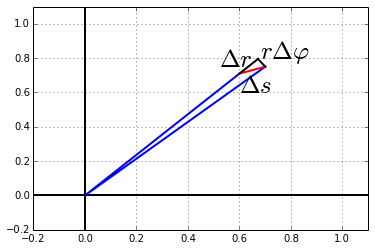

In [114]:
fig1=plt.figure()
plt.xlim(-0.2, 1.1)
plt.ylim(-0.2, 1.1)
plt.grid(True)
plt.axhline(linewidth=2.0, color="black")
plt.axvline(linewidth=2.0, color="black")
font = FontProperties()
#font = font0.copy()
font.set_size(25)
plt.text(0.6,0.6,'$\Delta s$',fontproperties=font)
plt.text(0.52,0.75,'$\Delta r$', fontproperties=font)
plt.text(0.68,0.80,'$r\Delta \\varphi$', fontproperties=font)
x = np.array([0.6,0.0, 0.7])
y = np.array([0.71, 0.0, 0.75])
plt.plot(x,y,linewidth=2)
x = [x[0],x[2]]
y = [y[0],y[2]]
plt.plot(x,y,linewidth=2, color='red')
lx=[x[0],1.12*x[0]]
ly=[y[0],1.12*y[0]]
plt.plot(lx,ly,linewidth=2, color='black')
lx=[1.12*x[0],x[1]]
ly=[1.12*y[0],y[1]]
plt.plot(lx,ly,linewidth=2, color='black')
plt.show()

 When going from point 1 to point 2, we first traverse a small circular arc of radius $r_1$ and then we move a small distance radially outward from $r_1$ to $r_2$. Provided the difference between the angles $\varphi_1$ and $\varphi_2$ is (very) small, these paths are approximately perpendicular and we can use Pythagoras' theorem to find the distance $\Delta s$. Note that the arc is approximately straight -- it has a length $r_1 \Delta \varphi$, where $\Delta \varphi = \varphi_2-\varphi_1$. So we have:
$$
\Delta s^2 = (arc~length)^2 + (\Delta r)^2 = r_1^2 (\Delta \varphi)^2 + \Delta r^2.
$$
For $r\equiv r_1 \approx r_2$, replacing the $\Delta$'s by $d$'s to emphasise the infinitesimal character of the differences, we finally have:
$$
ds^2 = dr^2+ r^2 d\varphi^2 .
$$
> You should recall this formula!

If we traverse a curved path in the plane, we must sum up all the $ds$, which actually boils down to calculating an integral:
$$
Path~length = \int_{start}^{end} ds = \int_{start}^{end} \sqrt{dr^2 + r^2 d\varphi^2}.
$$
Here, the boundaries $start$ and $end$ stand for the starting and end point of the path. 

Note that the path can often be written in the form $r(\varphi)$, i.e. we write $r$ as a function of $\varphi$. We can then write the integral as:
$$
Path~length = \int_{start}^{end} \sqrt{dr^2 + r^2 d\varphi^2} = \int_{\varphi_{start}}^{\varphi_{end}} \sqrt{\left(\frac{dr}{d\varphi}\right)^2 
+ r^2} \; d\varphi.
$$
(Note: this parametrisation is strictly speaking only possible when $r$ is a uni-valued function of $\varphi$; a meandering path generally does not have this property.)

**Exercise:** write the same expression as an integral over $dr$ instead of $d\varphi$. Please sketch two paths, one which is more suitable for the expression above (the inegral over $\varphi$) and the other more convenient for the expression you obtained in this problem. 

## Cylindrical coordinates

Three dimensional systems may have axial symmetry. An example is an electrically charged wire of which we would like to calculate the electric field, or a current-carrying wire for which we would like to calculate the magnetic field. For such problems the most convenient coordinates are *cylndrical coordinates*. For convenience, we choose the symmetry-axis as the $z$-axis. Note that this can be done as we can choose the coordinate system ourselves - this is not imposed by the problem. 

Cylindrical coordinates are defined straightforwardly: we use polar coordinates $\rho$ and $\varphi$ in the $xy$ plane, and the distance $z$ along the symmetry-axis as the third coordinate. If the axis system is chosen in the space surrounding us, we therefore have two coordinates which have the dimension of a distance: $\rho$ and $z$. The other coordinate, $\varphi$, is of course dimensionless.

What is the distance travelled along a path when we express this in cylindrical coordinates? Let's consider at an example (Figure).

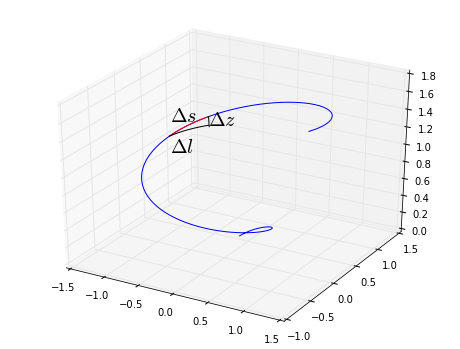

In [115]:
fig = plt.figure(figsize=(8.0,6.0))
ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
theta = np.linspace(0.0,8.0,100)
r = 0.1+0.2*theta
x = np.sqrt(r)*np.sin(theta)
y = np.sqrt(r)*np.cos(theta)
ax.plot(x, y, r, label='')
theta = np.linspace(5.0,5.5,10)
font = FontProperties()
#font = font0.copy()
font.set_size(20)
ax.text(x[62],y[62], r[60]+0.19,'$\Delta s$',fontproperties=font)
ax.text(x[62],y[62], r[60]-0.16,'$\Delta l$',fontproperties=font)
ax.text(x[68],y[68], r[68]-0.1,'$\Delta z$',fontproperties=font)
r = 0.1+0.2*theta
x = np.sqrt(r)*np.sin(theta)
y = np.sqrt(r)*np.cos(theta)
ax.plot(x, y, r, color='red')
theta = np.linspace(5.0,5.5,10)
r = 0.1+0.2*theta
x = np.sqrt(r)*np.sin(theta)
y = np.sqrt(r)*np.cos(theta)
ax.plot(x, y, r[0], color='black')
r = [r[0],r[9]]
theta = [theta[9]]
x = np.sqrt(r)*np.sin(theta)
y = np.sqrt(r)*np.cos(theta)
ax.plot(x, y, r, color='black')
plt.show()

We want to find the length of the (small) red segment $\Delta s$. By inspecting the figure, we see that the horizontal (i.e. parallel to the $xy$-plane) segment $\Delta l$ is perpendicular to the vertical segment $dz$. Using for $\Delta l$ the length we obtained before for a line segment in the $xy$ plane, expressed in polar coordinates, we immediately find:
$$
\Delta s^2 = \Delta l^2 + \Delta z^2 = \Delta \rho^2 + \rho^2 \Delta \varphi^2 + \Delta z^2.
$$
Using $d$ instead of $\Delta$ for infinitesimal changes, this reads:
$$
ds^2 = dl^2 + dz^2 = d\rho^2 + \rho^2 d\varphi^2 + dz^2.
$$

## Spherical coordinates

For problems with spherical symmetry, we use *spherical coordinates*. These work as follows. For a point $\bf r$ in 3D space, we can specify the position of that point by specifying its (1) distance to the origin and (2) the direction of the line connecting the origin to our point. The specification of this direction can be identified with a point on a  sphere which is centered at the origin:

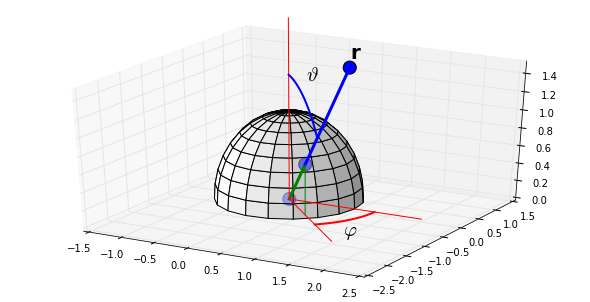

In [116]:
step = 0.04
maxval = 1.0
fig = plt.figure(figsize=(8.0,4.0))
ax = Axes3D(fig)
ax.set_xlim([-1.5,2.5])
ax.set_ylim([-2.5,1.5])
ax.set_zlim(0.0,1.5)

# create supporting points in polar coordinates
r = np.linspace(0,1.0,10)
r = np.sin(0.5*np.pi*r)
p = np.linspace(0,2*np.pi,20)
R,P = np.meshgrid(r,p)

# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

#Z = ((R**2 - 1)**2)
Z = np.sqrt(1.-R**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,color='white')#, cmap=cm.jet)
v = 1.0/np.sqrt(3.0)
x = np.array([0.0,v])
y = np.array([0.0,-v])
z = np.array([0.0,v])
ax.plot(x, y, z,c='g',linewidth=3)
x = np.array([v,2.0])
y = np.array([-v,-2.0])
z = np.array([v,2.0])
ax.plot(x, y, z,c='b',linewidth=3)
x = np.array([0.0,2.0])
y = np.array([0.0,0.0])
z = np.array([0.0,0.0])
ax.plot(x, y, z,c='r',linewidth=1)
x = np.array([v,v])
y = np.array([-v,-v])
z = np.array([v,0.0])
ax.plot(x, y, z,c='g',linewidth=1)
x = np.array([0,1.5])
y = np.array([0,-1.5])
z = np.array([0.0,0.0])
ax.plot(x, y, z,c='r',linewidth=1)
x = np.array([0,0])
y = np.array([0,0])
z = np.array([0.0,2.0])
ax.plot(x, y, z,c='r',linewidth=1)
v = 1.0/np.sqrt(3.0)
xx = [0.0, v, 2.0]
yy = [0.0, -v, -2.0]
zz = np.copy(xx)
ax.scatter(xx, yy, zz, zdir='z', s=170, c='b', marker='o')
font = FontProperties()
font.set_size(20)
font.set_weight('bold')
ax.text(xx[2],yy[2]+0.04, zz[2]+0.08,'r',fontproperties=font)
ax.text(1.5,-1.2, 0.0,'$\\varphi$',fontproperties=font)
ax.text(0.6,-0.6, 1.5,'$\\vartheta$',fontproperties=font)
p = np.linspace(0.0, -0.25*np.pi,25)
x = 1.3*np.cos(p)
y = 1.3*np.sin(p)
z = np.zeros((25))
ax.plot(x, y, z, c='r', linewidth=2)
p = np.linspace(0.0, 0.25*np.pi,25)
x = 1.4*np.sin(p)
y = -1.4*np.sin(p)
z = 1.4*np.cos(p)
ax.plot(x, y, z, c='b', linewidth=2)
plt.show()


The relation between Cartesian and coordinates is defined by
$$
x = r \cos \varphi \sin \vartheta $$
$$ y = r \sin\varphi \sin \vartheta $$
$$ z = r \cos\vartheta $$
The inverse transformation is easy to find:
$$
r = \sqrt{x^2+y^2+z^2} $$
$$ \theta = \arccos(z/\sqrt{x^2+y^2}) $$
$$ \phi = \arctan(y/x) $$
These relations can be derived from the following figure:



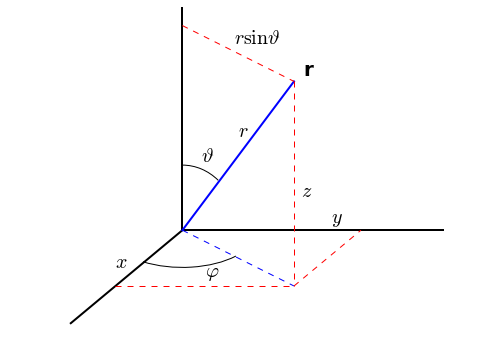

In [117]:
fig = plt.figure(figsize=(8.0,6.0))
plt.axis('off')
plt.plot([0.0,0.7],[0.0,0.0],linewidth=2,c='black')
plt.plot([0.0,-0.3],[0.0,-0.5],linewidth=2,c='black')
plt.plot([0.0,0.0],[0.0,1.2],linewidth=2,c='black')
plt.plot([0.0,0.3],[0.0,0.8],linewidth=2,c='blue')
plt.plot([0.3,0.3],[0.8,-0.3],linewidth=1,c='red',ls='--')
plt.plot([0.0,0.3],[0.0,-0.3],linewidth=1,c='blue',ls='--')
plt.plot([-0.18,0.3],[-0.3,-0.3],linewidth=1,c='red',ls='--')
plt.plot([0.3,0.48],[-0.3,0.0],linewidth=1,c='red',ls='--')
plt.plot([0.0, 0.3], [1.1,0.8],linewidth=1,c='red', ls='--')
ax1 = fig.add_subplot(111)
ax1.add_patch(
    patches.Arc((0.0, 0.0),   # (x,y)
        0.3, 0.7, theta1=50, theta2=90)          # radius
    )
ax1.add_patch(
    patches.Arc((0.0, 0.0),   # (x,y)
        0.4, 0.4, theta1=-122, theta2=-44)          # radius
    )
font = FontProperties()
font.set_size(20)
font.set_weight('bold')
ax1.text(0.33,0.83,'r',fontproperties=font)
font.set_weight('normal')
ax1.text(0.15,0.5,'$r$',fontproperties=font)
ax1.text(0.05,0.37,'$\\vartheta$',fontproperties=font)
ax1.text(0.06,-0.25,'$\\varphi$',fontproperties=font)
ax1.text(0.4,0.04,'$y$',fontproperties=font)
ax1.text(-0.18,-0.2,'$x$',fontproperties=font)
ax1.text(0.32,0.18,'$z$',fontproperties=font)
ax1.text(0.14,1.0,'$r\\sin\\vartheta$',fontproperties=font)
plt.show()

The distance related to a change in the spherical coordinates is calculated using Pythagoras' theorem. The length $ds$ of a short segment on the sphere with radius $r$ corresponding to changes in the polar angles of $d\vartheta$ and $d\varphi$ is given as $$ dl^2 = r^2 \left(\sin^2 \vartheta d\varphi^2 + d\vartheta^2\right). $$
In order to verify this, it is important to realize that all points with *the same* coordinate $\vartheta$ span a circle in a horizontal plane with a radius $r\sin\vartheta$ as shown in the figure below.

From this we can also infer that, for a segment with a radial component $dr$ in addition to the displacement on the sphere, the displacement is:
$$ ds^2 = r^2 \left(\sin^2 \vartheta d\varphi^2 + d\vartheta^2\right) + dr^2.$$ 

The picture below shows the geometry behind the calculation of this displacement.

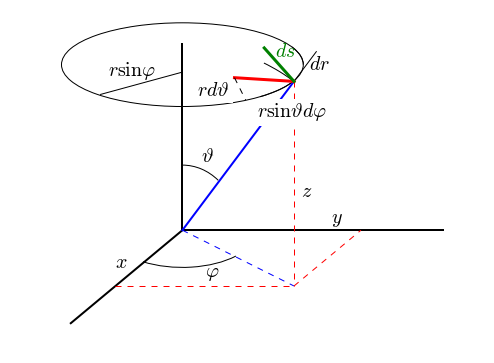

In [133]:
fig = plt.figure(figsize=(8.0,6.0))
plt.axis('off')
plt.plot([0.0,0.7],[0.0,0.0],linewidth=2,c='black')
plt.plot([0.0,-0.3],[0.0,-0.5],linewidth=2,c='black')
plt.plot([0.0,0.0],[0.0,1.0],linewidth=2,c='black')
plt.plot([0.0,0.3],[0.0,0.8],linewidth=2,c='blue')
plt.plot([0.3,0.36],[0.8,0.96],linewidth=1,c='black')
plt.plot([0.3,0.3],[0.8,-0.3],linewidth=1,c='red',ls='--')
plt.plot([0.0,0.3],[0.0,-0.3],linewidth=1,c='blue',ls='--')
plt.plot([-0.18,0.3],[-0.3,-0.3],linewidth=1,c='red',ls='--')
plt.plot([0.3,0.48],[-0.3,0.0],linewidth=1,c='red',ls='--')
plt.plot([0.3,0.14],[0.8,0.82],linewidth=3,c='red')
plt.plot([0.14,0.17],[0.82,0.70],linewidth=1,c='black',ls='--')
plt.plot([0.3,0.22],[0.8,0.98],linewidth=3,c='green')
#plt.plot([0.3,0.22],[0.8,0.71],linewidth=3,c='cyan')
plt.plot([0.0,-0.22], [0.85, 0.73],color='black')
ax1 = fig.add_subplot(111)
ax1.add_patch(
    patches.Arc((0.0, 0.0),   # (x,y)
        0.3, 0.7, theta1=50, theta2=90)          # radius
    )
ax1.add_patch(
    patches.Arc((0.0, 0.0),   # (x,y)
        0.4, 0.4, theta1=-122, theta2=-44)          # radius
    )
ax1.add_patch(
    patches.Arc((0.0, 0.89),   # (x,y)
        0.65, 0.45, theta1=-50, theta2=-22)          # radius
    )
ax1.add_patch(
    patches.Arc((0.0, 0.89),   # (x,y)
        0.65, 0.45, theta1=0, theta2=360)          # radius
    )
ax1.add_patch(
    patches.Arc((0.0, 0.89),   # (x,y)
        0.65, 0.45, theta1=0, theta2=25)          # radius
    )
ax1.add_patch(
    patches.Arc((0.0, 0.0),   # (x,y)
        1.0, 2.0, theta1=53, theta2=64)          # radius
    )
font = FontProperties()
font.set_size(20)
font.set_weight('bold')
#ax1.text(0.37,0.80,'r',fontproperties=font)
font.set_weight('normal')
#ax1.text(0.15,0.5,'$r$',fontproperties=font)
ax1.text(0.05,0.37,'$\\vartheta$',fontproperties=font)
ax1.text(0.06,-0.25,'$\\varphi$',fontproperties=font)
ax1.text(0.4,0.04,'$y$',fontproperties=font)
ax1.text(-0.18,-0.2,'$x$',fontproperties=font)
ax1.text(0.32,0.18,'$z$',fontproperties=font)
ax1.text(0.04,0.72,'$r d\\vartheta$',fontproperties=font,backgroundcolor='white')
ax1.text(0.34,0.86,'$dr$',fontproperties=font)
ax1.text(0.20,0.61,'$r \sin\\vartheta d\\varphi$',fontproperties=font,backgroundcolor='white')
ax1.text(0.25,0.93,'$ds$',fontproperties=font,color='green')
ax1.text(-0.2,0.83,'$r\sin\\varphi$',fontproperties=font,color='black')
plt.show()

#Problems
$$\newcommand{\bfr}{{\bf r}}$$
1. [D1] From the transformation from polar to Cartesian coordinates, show that 
$$ \frac{\partial}{\partial x} = \cos\varphi \frac{\partial}{\partial r} - \frac{\sin\varphi}{r} \frac{\partial}{\partial \varphi}$$
and
$$ \frac{\partial}{\partial y} = \sin\varphi \frac{\partial}{\partial r} + \frac{\cos\varphi}{r} \frac{\partial}{\partial \varphi}.$$
(Use the chain rule for differentiation).

2. [D2] Using the result of problem 1, show that the Laplace operator acting on a function $\psi(\bfr)$ in polar coordinates takes the form
 $$\nabla^2 \psi(\bfr) =\left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) \psi(\bfr) = \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial \psi(r,\varphi)}{\partial r} \right) + \frac{1}{r^2} \frac{\partial \psi(r,\varphi)}{\partial \varphi^2}.$$

 In a similar fashion it can be shown that for spherical coordinates, the Laplace operator acting on a function $\psi(\bfr)$ becomes: $$\nabla^2 \psi (r,\vartheta,\varphi) = 
\frac{1}{r^2} \frac{\partial}{\partial r^2} \left( r^2 \frac{\partial \psi(r,\vartheta,\varphi)}{\partial r} \right) + \frac{1}{r^2\sin^2\vartheta} \frac{\partial \psi(r,\vartheta, \varphi)}{\partial \varphi^2} + \frac{1}{r^2\sin\vartheta} 
\frac{\partial}{\partial \vartheta}\left( \sin\vartheta \frac{\partial\psi(r,\vartheta, \varphi)}{\partial \vartheta}\right).$$ This is however even more tedious (you do not have to show this).

3. D[2] A particle moves over a cone which is characterized by the condition $r = z$. Calculate the kinetic energy expressed in terms of the cylindrical coordinates $z$ and $\varphi$ and their first order time derivatives.

4. D[2] The same question for a particle moving on a spherical shell of radius $R$. (Use coordinates $\varphi$ and $\vartheta$.)